# Alexa Review Analysis using Artificial Neural Network (ANN) Architecture
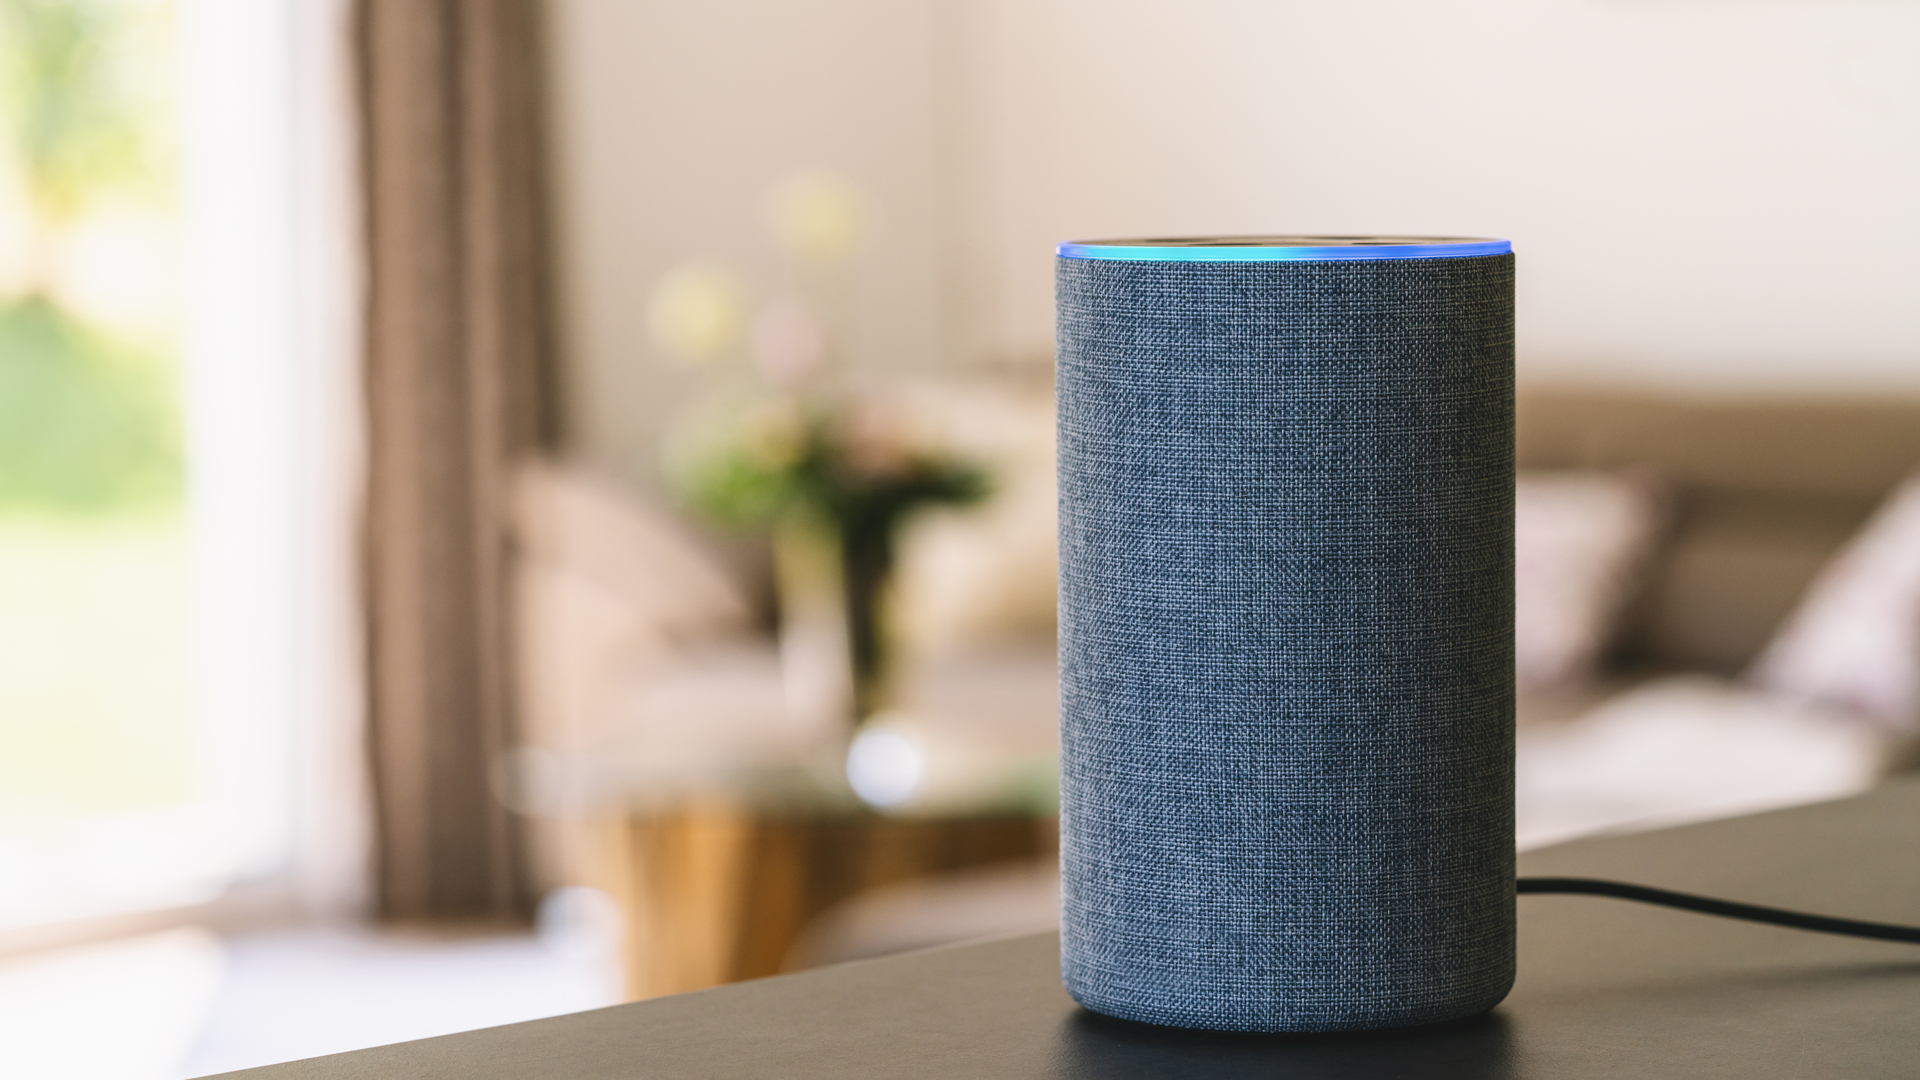

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')
df_alexa

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

# Data Analysis

In [3]:
positive = df_alexa[df_alexa['feedback']==1]

In [4]:
positive.sample(5)

rating       date         variation  \
1433       5  30-Jul-18       Black  Show   
1873       3  28-Jul-18       Black  Plus   
835        5  30-Jul-18  Charcoal Fabric    
2057       5  10-Jul-18       Black  Plus   
209        4  29-Jul-18  Charcoal Fabric    

                                       verified_reviews  feedback  
1433  Works well with optional cameras.  Conferencin...         1  
1873  I like the list ability and the music I can pl...         1  
835   I have had for only a week, so I am still lear...         1  
2057  We are really enjoying the echo plus. It is fu...         1  
209                                 speaker sounds good         1

In [5]:
positive.feedback.unique()

array([1])

In [6]:
negative = df_alexa[df_alexa['feedback']==0]

In [7]:
negative.sample(5)

rating       date variation  \
368       1  28-Jul-18     Black   
620       1  31-May-18     White   
499       1  25-Jun-18     Black   
544       2  15-Jun-18     Black   
388       1  24-Jul-18     Black   

                                      verified_reviews  feedback  
368  I returned 2 Echo Dots & am only getting refun...         0  
620  Brought to replace one that I moved and doesn'...         0  
499  Now I'm weary about these picking up conversat...         0  
544  The echo dot disconnects from the speaker abou...         0  
388  Never could get it to work. A techie friend lo...         0

In [8]:
df_alexa.feedback.unique()

array([1, 0])

In [9]:
a = df_alexa[['rating','feedback']].astype("str")

In [10]:
import plotly.express as px
fig = px.histogram( x=a["feedback"], title='Feedback')
fig.show()

In [11]:
fig = px.histogram( x=a["rating"], title='Rating')
fig.show()

In [12]:
fig = px.histogram( x=df_alexa["variation"],color = df_alexa["feedback"], title='Variation and Feedback plot')
fig.show()

In [13]:
fig = px.histogram( x=df_alexa["variation"],color = df_alexa["rating"], title='Variation vs Rating')
fig.show()

# Modifying date column

In [14]:
df_alexa

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [15]:
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [16]:
df_alexa

variation                                   verified_reviews  \
0     Charcoal Fabric                                       Love my Echo!   
1     Charcoal Fabric                                           Loved it!   
2       Walnut Finish   Sometimes while playing a game, you can answer...   
3     Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...   
4     Charcoal Fabric                                               Music   
...                ...                                                ...   
3145        Black  Dot  Perfect for kids, adults and everyone in betwe...   
3146        Black  Dot  Listening to music, searching locations, check...   
3147        Black  Dot  I do love these things, i have them running my...   
3148        White  Dot  Only complaint I have is that the sound qualit...   
3149        Black  Dot                                               Good   

      feedback  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
3145         1  
3146         1  
3147         1  
3148         1  
3149         1  

[3150 rows x 3 columns]

# Making Dummy Variable

In [17]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first= 'true')

In [18]:
variation_dummies

Black  Dot  Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0              0            0            0            0                 1   
1              0            0            0            0                 1   
2              0            0            0            0                 0   
3              0            0            0            0                 1   
4              0            0            0            0                 1   
...          ...          ...          ...          ...               ...   
3145           1            0            0            0                 0   
3146           1            0            0            0                 0   
3147           1            0            0            0                 0   
3148           0            0            0            0                 0   
3149           1            0            0            0                 0   

      Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                                0                     0            0   
1                                0                     0            0   
2                                0                     0            0   
3                                0                     0            0   
4                                0                     0            0   
...                            ...                   ...          ...   
3145                             0                     0            0   
3146                             0                     0            0   
3147                             0                     0            0   
3148                             0                     0            0   
3149                             0                     0            0   

      Sandstone Fabric   Walnut Finish   White  White  Dot  White  Plus  \
0                     0               0      0           0            0   
1                     0               0      0           0            0   
2                     0               1      0           0            0   
3                     0               0      0           0            0   
4                     0               0      0           0            0   
...                 ...             ...    ...         ...          ...   
3145                  0               0      0           0            0   
3146                  0               0      0           0            0   
3147                  0               0      0           0            0   
3148                  0               0      0           1            0   
3149                  0               0      0           0            0   

      White  Show  White  Spot  
0               0            0  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
...           ...          ...  
3145            0            0  
3146            0            0  
3147            0            0  
3148            0            0  
3149            0            0  

[3150 rows x 15 columns]

# Dropping the Variation Column 

In [19]:
df_alexa.drop('variation', axis = 1, inplace = True)

In [20]:
df_alexa

verified_reviews  feedback
0                                         Love my Echo!         1
1                                             Loved it!         1
2     Sometimes while playing a game, you can answer...         1
3     I have had a lot of fun with this thing. My 4 ...         1
4                                                 Music         1
...                                                 ...       ...
3145  Perfect for kids, adults and everyone in betwe...         1
3146  Listening to music, searching locations, check...         1
3147  I do love these things, i have them running my...         1
3148  Only complaint I have is that the sound qualit...         1
3149                                               Good         1

[3150 rows x 2 columns]

# Adding dummies with main dataset

In [21]:
df_alex = pd.concat([df_alexa, variation_dummies], axis = 1)

In [22]:
df_alex

verified_reviews  feedback  Black  Dot  \
0                                         Love my Echo!         1           0   
1                                             Loved it!         1           0   
2     Sometimes while playing a game, you can answer...         1           0   
3     I have had a lot of fun with this thing. My 4 ...         1           0   
4                                                 Music         1           0   
...                                                 ...       ...         ...   
3145  Perfect for kids, adults and everyone in betwe...         1           1   
3146  Listening to music, searching locations, check...         1           1   
3147  I do love these things, i have them running my...         1           1   
3148  Only complaint I have is that the sound qualit...         1           0   
3149                                               Good         1           1   

      Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0               0            0            0                 1   
1               0            0            0                 1   
2               0            0            0                 0   
3               0            0            0                 1   
4               0            0            0                 1   
...           ...          ...          ...               ...   
3145            0            0            0                 0   
3146            0            0            0                 0   
3147            0            0            0                 0   
3148            0            0            0                 0   
3149            0            0            0                 0   

      Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                                0                     0            0   
1                                0                     0            0   
2                                0                     0            0   
3                                0                     0            0   
4                                0                     0            0   
...                            ...                   ...          ...   
3145                             0                     0            0   
3146                             0                     0            0   
3147                             0                     0            0   
3148                             0                     0            0   
3149                             0                     0            0   

      Sandstone Fabric   Walnut Finish   White  White  Dot  White  Plus  \
0                     0               0      0           0            0   
1                     0               0      0           0            0   
2                     0               1      0           0            0   
3                     0               0      0           0            0   
4                     0               0      0           0            0   
...                 ...             ...    ...         ...          ...   
3145                  0               0      0           0            0   
3146                  0               0      0           0            0   
3147                  0               0      0           0            0   
3148                  0               0      0           1            0   
3149                  0               0      0           0            0   

      White  Show  White  Spot  
0               0            0  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
...           ...          ...  
3145            0            0  
3146            0            0  
3147            0            0  
3148            0            0  
3149            0            0  

[3150 rows x 17 columns]

# Feature Extraction

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() 
alexa_countvect = count_vect.fit_transform(df_alex['verified_reviews'])

In [24]:
alexa_countvect.shape

(3150, 4044)

In [25]:
aa=count_vect.get_feature_names()
print(count_vect.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [26]:
print(alexa_countvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
df_alex.drop(['verified_reviews'], axis =1, inplace = True)

In [28]:
rev = pd.DataFrame(alexa_countvect.toarray())

In [29]:
df_alexa = pd.concat([df_alex, rev],axis =1)

In [30]:
df_alexa

feedback  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0            1           0            0            0            0   
1            1           0            0            0            0   
2            1           0            0            0            0   
3            1           0            0            0            0   
4            1           0            0            0            0   
...        ...         ...          ...          ...          ...   
3145         1           1            0            0            0   
3146         1           1            0            0            0   
3147         1           1            0            0            0   
3148         1           0            0            0            0   
3149         1           1            0            0            0   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0                    1                             0                     0   
1                    1                             0                     0   
2                    0                             0                     0   
3                    1                             0                     0   
4                    1                             0                     0   
...                ...                           ...                   ...   
3145                 0                             0                     0   
3146                 0                             0                     0   
3147                 0                             0                     0   
3148                 0                             0                     0   
3149                 0                             0                     0   

      Oak Finish   Sandstone Fabric   ...  4034  4035  4036  4037  4038  4039  \
0               0                  0  ...     0     0     0     0     0     0   
1               0                  0  ...     0     0     0     0     0     0   
2               0                  0  ...     0     0     0     0     0     0   
3               0                  0  ...     0     1     0     0     0     0   
4               0                  0  ...     0     0     0     0     0     0   
...           ...                ...  ...   ...   ...   ...   ...   ...   ...   
3145            0                  0  ...     0     0     0     0     0     0   
3146            0                  0  ...     0     0     0     0     0     0   
3147            0                  0  ...     0     0     0     0     0     0   
3148            0                  0  ...     0     0     0     0     0     0   
3149            0                  0  ...     0     0     0     0     0     0   

      4040  4041  4042  4043  
0        0     0     0     0  
1        0     0     0     0  
2        0     0     0     0  
3        0     0     0     0  
4        0     0     0     0  
...    ...   ...   ...   ...  
3145     0     0     0     0  
3146     0     0     0     0  
3147     0     0     0     0  
3148     0     0     0     0  
3149     0     0     0     0  

[3150 rows x 4060 columns]

In [31]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

# Word Plot

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = aa
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
X = df_alexa.drop(['feedback'], axis = 1)

In [ ]:
y = df_alexa['feedback']

In [ ]:
X

In [ ]:
y

In [ ]:
print(X.shape)
print(y.shape)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Building ANN Architecture with 5 Hidden Layers

In [ ]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (4059,)))
classifier.add(tf.keras.layers.Dense(units = 600, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 300, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 700, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 350, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', ))
classifier.summary()

# Compiling with ADAM Optimizer and Binary Crossentropy Loss Function

In [ ]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting Dataset into the Model

In [ ]:
history = classifier.fit(X_train, y_train, epochs = 10)

# Loss and Accuracy Plot

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['loss'], name='Loss',
                         line=dict(color='royalblue', width=3)))


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'],  name = 'Accuracy',
                         line=dict(color='firebrick', width=3)))

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, linewidth=1, cmap="Greens")

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(y_test, y_pred))

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## This Model can Successfully Analyse Alexa Reviews With an Accuracy of 94%